# COVID - 19 Symptoms Checker

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

In [2]:
data = pd.read_csv('Cleaned-Data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [4]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [5]:
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [7]:
data1 = data.drop(['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe'],axis=1)

In [8]:
data1.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,China


In [9]:
data1.drop(['Country'],axis=1,inplace=True)

<AxesSubplot:>

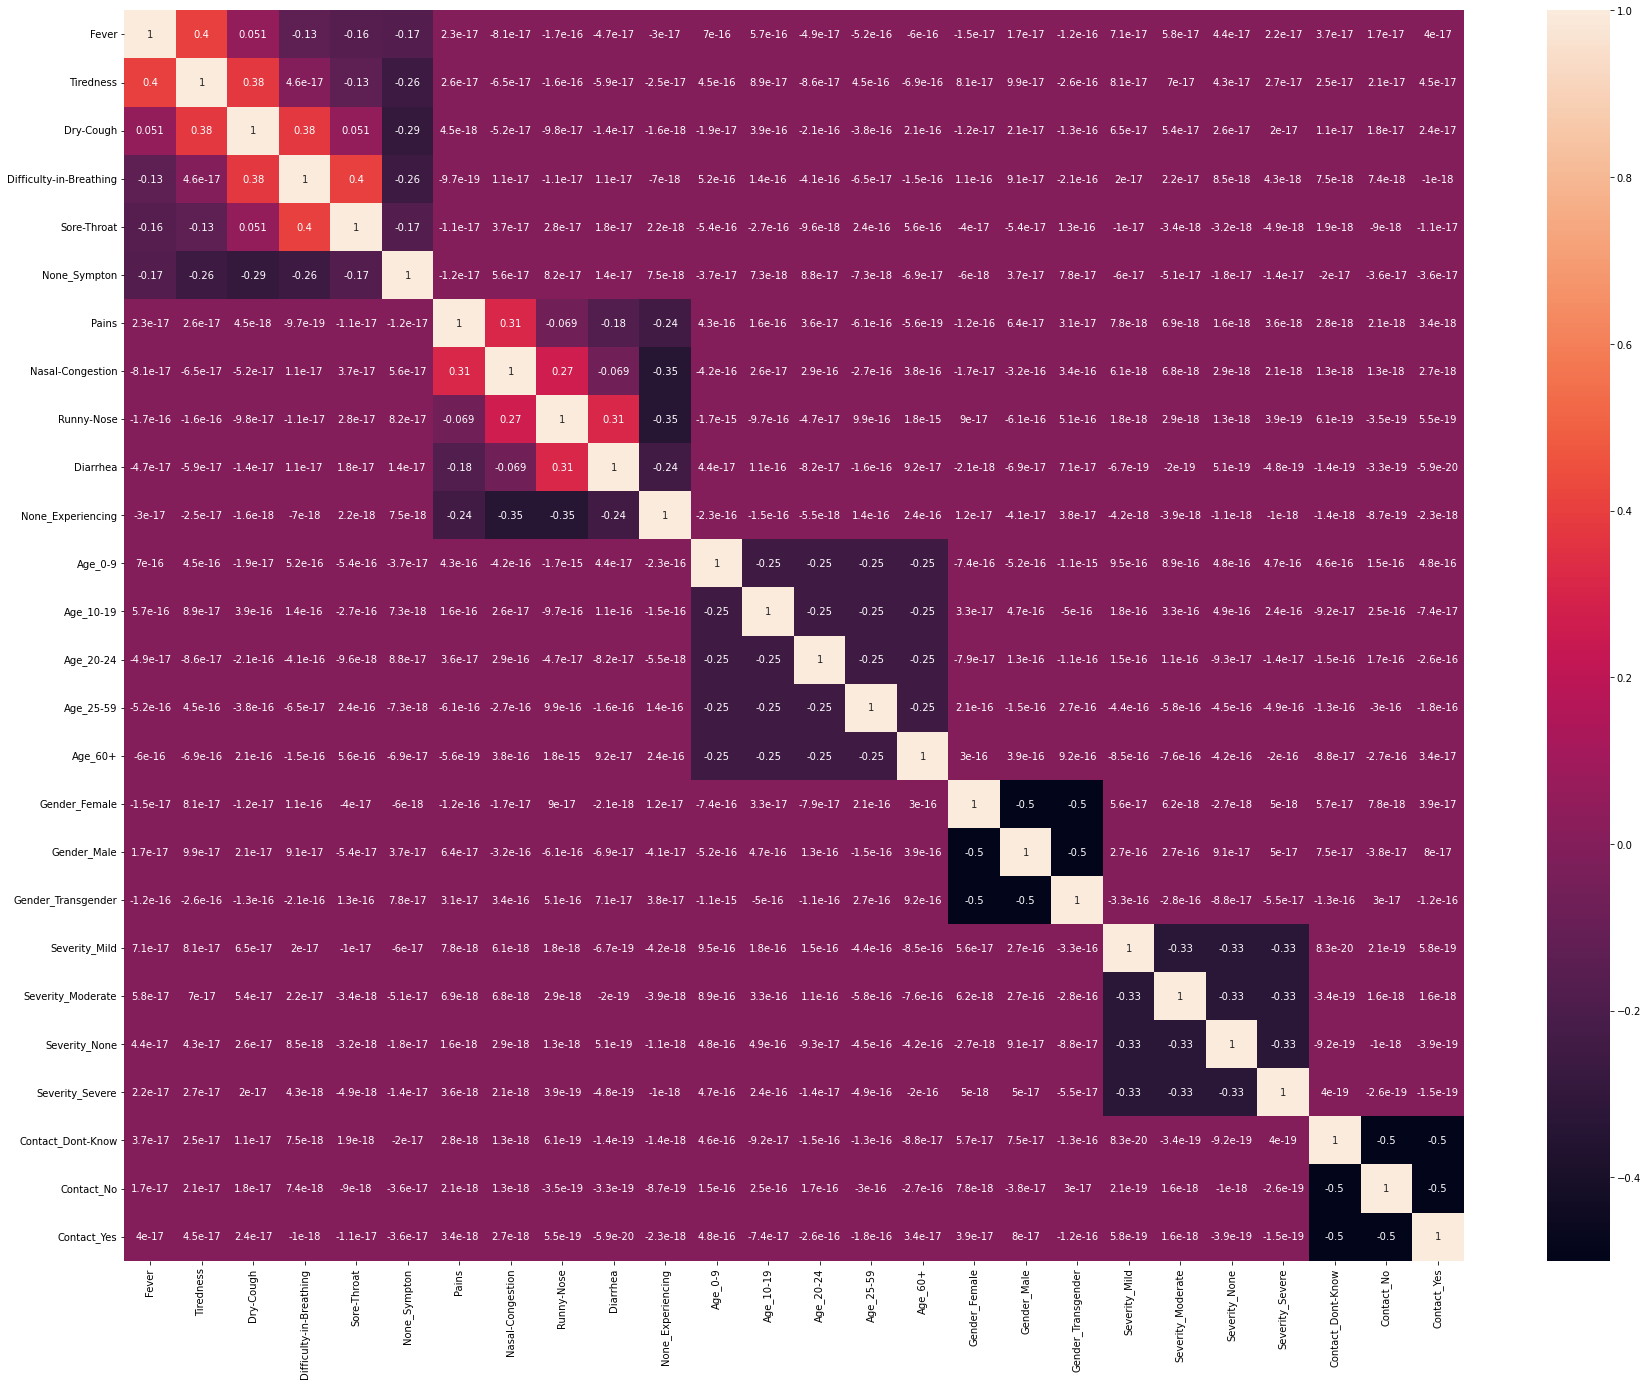

In [15]:
plt.figure(figsize=(30,23))
sns.heatmap(data.corr(), annot=True)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(data1)

<AxesSubplot:xlabel='Severity_None', ylabel='count'>

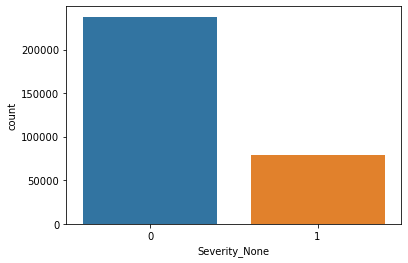

In [17]:
sns.countplot(x=data['Severity_None'])

In [18]:
indicators =[]
indicators2 =[]
target_column=[]
severity= []

indicators = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender']
target_columns = ['Severity_None']
indicators2 = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender', 'Severity_None']
severity=['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe']
risk=data[severity]
features = data[indicators]
targets = data[target_columns]
display(features.head(), targets.head())

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Male,Gender_Female,Gender_Transgender
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0


,Severity_None
0,0
1,0
2,0
3,0
4,0


<AxesSubplot:xlabel='Occurence_Count', ylabel='Indicator'>

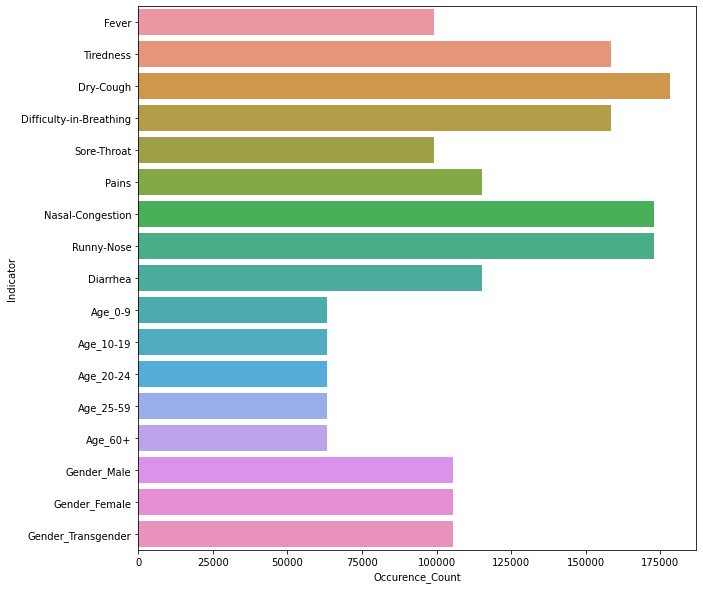

In [19]:
plt.figure(figsize = (10 ,10))
temp = []
for i in indicators:
    temp.append(sum(features[i].values))
temp_df = pd.DataFrame({"Indicator":indicators, "Occurence_Count":temp})
sns.barplot(data = temp_df, y="Indicator", x="Occurence_Count")

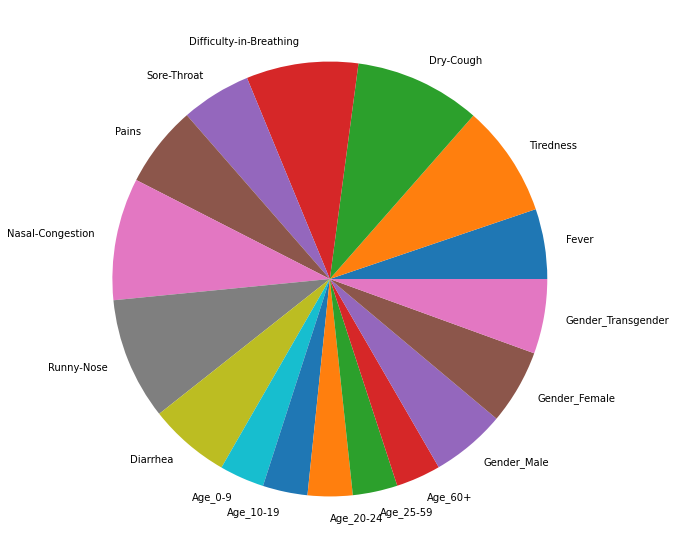

In [20]:
plt.figure(figsize = (10 ,10))
plt.pie(data=temp_df, x="Occurence_Count", labels=temp_df["Indicator"])
plt.show()

In [21]:
def get_symptom_count(the_list):
    return sum(the_list.values)
features['Total_Symptom'] = features[indicators].apply(get_symptom_count, axis=1)
feats = data[indicators2]
feats['Total_Symptom'] = feats[indicators].apply(get_symptom_count, axis=1)

C:\Users\sanaa\AppData\Local\Temp/ipykernel_4912/1425476227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Total_Symptom'] = features[indicators].apply(get_symptom_count, axis=1)
C:\Users\sanaa\AppData\Local\Temp/ipykernel_4912/1425476227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feats['Total_Symptom'] = feats[indicators].apply(get_symptom_count, axis=1)


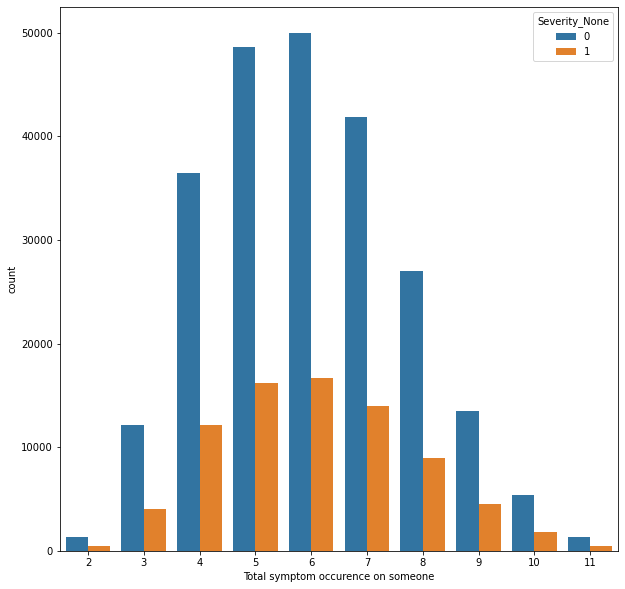

In [22]:
plt.figure(figsize = (10 ,10))
sns.countplot(data=feats, x='Total_Symptom', hue='Severity_None')
plt.xlabel("Total symptom occurence on someone")
plt.show()

# PCA

In [23]:
pca = PCA(2)
pca

PCA(n_components=2)

In [24]:
df = pca.fit_transform(train_df_scaled)
df = pd.DataFrame(df)
df.columns = ['P1', 'P2']
print(df.head())

         P1        P2
0 -2.083174 -1.801644
1 -2.083356 -1.801677
2 -2.083407 -1.802333
3 -2.083174 -1.801644
4 -2.083356 -1.801677


In [25]:
inertias = []

for i in range(1,15):
    km=KMeans(n_clusters=i, random_state=2)
    km.fit(train_df_scaled)
    inertias.append(km.inertia_)

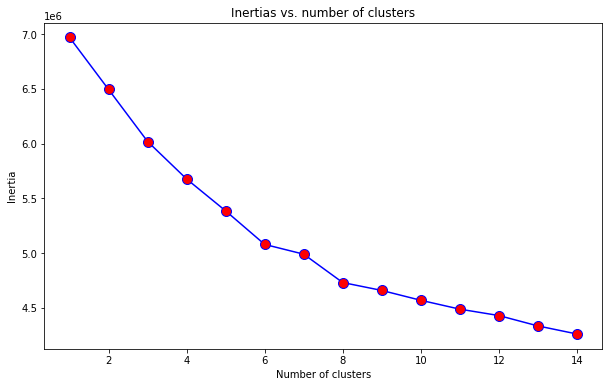

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15), inertias, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertias vs. number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
from sklearn.metrics import davies_bouldin_score

In [28]:
bouldin_score=[]

for i in range(4,15):
    km=KMeans(n_clusters=i, random_state=2)
    labels=km.fit_predict(train_df_scaled)
    bouldin_score.append(davies_bouldin_score(train_df_scaled, labels))

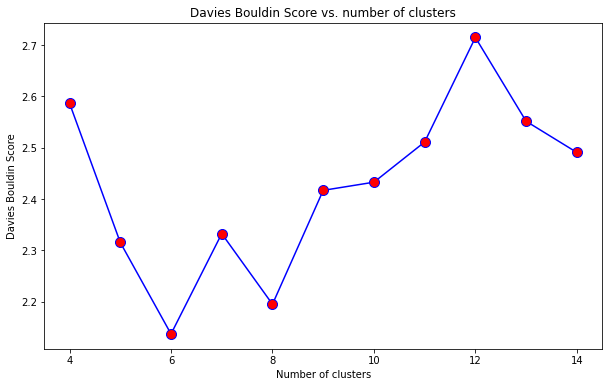

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(4,15), bouldin_score, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Davies Bouldin Score vs. number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 7)
label = kmeans.fit_predict(df)
print(label)

[2 2 2 ... 3 3 3]


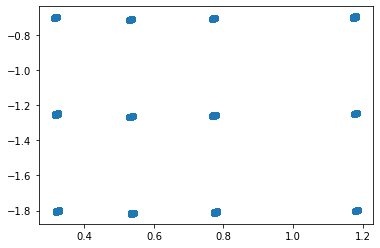

In [32]:
import matplotlib.pyplot as plt
 
filtered_label0 = df[label == 0]
plt.scatter(filtered_label0['P1'] , filtered_label0['P2'])
plt.show()

No handles with labels found to put in legend.


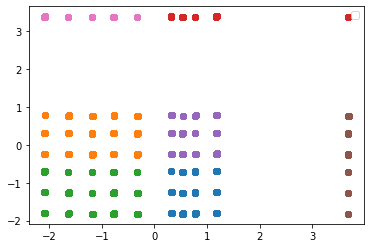

In [34]:
u_labels = np.unique(label)
 
#plotting the results:
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
filtered_label5 = df[label == 5]
filtered_label6 = df[label == 6]


plt.scatter(filtered_label0['P1'] , filtered_label0['P2'])
plt.scatter(filtered_label1['P1'] , filtered_label1['P2'])
plt.scatter(filtered_label2['P1'] , filtered_label2['P2'])
plt.scatter(filtered_label3['P1'] , filtered_label3['P2'])
plt.scatter(filtered_label4['P1'] , filtered_label4['P2'])
plt.scatter(filtered_label5['P1'] , filtered_label5['P2'])
plt.scatter(filtered_label6['P1'] , filtered_label6['P2'])

plt.legend()
plt.show()

No handles with labels found to put in legend.


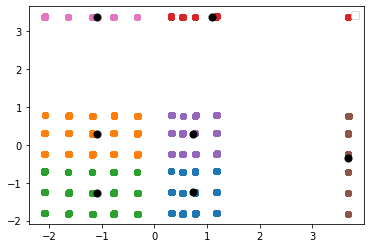

In [35]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:

filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
filtered_label5 = df[label == 5]
filtered_label6 = df[label == 6]


plt.scatter(filtered_label0['P1'] , filtered_label0['P2'])
plt.scatter(filtered_label1['P1'] , filtered_label1['P2'])
plt.scatter(filtered_label2['P1'] , filtered_label2['P2'])
plt.scatter(filtered_label3['P1'] , filtered_label3['P2'])
plt.scatter(filtered_label4['P1'] , filtered_label4['P2'])
plt.scatter(filtered_label5['P1'] , filtered_label5['P2'])
plt.scatter(filtered_label6['P1'] , filtered_label6['P2'])

plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
plt.legend()
plt.show()

<AxesSubplot:>

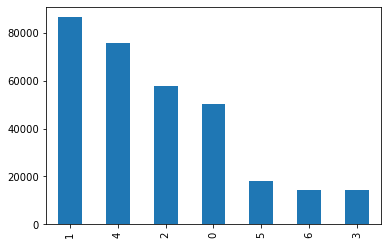

In [36]:
resultDfk = pd.DataFrame(label)
resultDfk.iloc[:,0].value_counts().plot.bar()

In [37]:
datas=data.sample(n=25000)
datas=datas.drop(['Country'],axis=1)

In [38]:
code = []

for i in range(datas.shape[0]):
    if (datas.iloc[i]['Severity_Mild']==1):
      
        code.append(1)
    elif (datas.iloc[i]['Severity_Moderate']==1):
 
        code.append(2)
    elif (datas.iloc[i]['Severity_Severe']==1):
   
        code.append(3)
    elif (datas.iloc[i]['Severity_None']==1):
   
        code.append(4)
    else:
        poke_type.append('NaN')
        code.append('NaN')

In [39]:
datas['code'] = code

<AxesSubplot:xlabel='code', ylabel='count'>

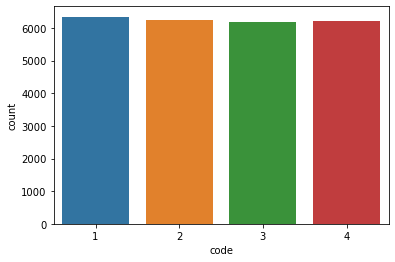

In [40]:
sns.countplot(x=datas['code'])

<AxesSubplot:>

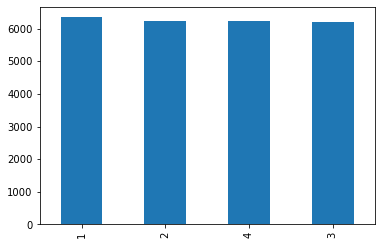

In [41]:
datas['code'].value_counts().plot.bar()

In [42]:
datas1=datas.drop(['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe' ],axis=1) 
datas1.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,code
235743,0,0,1,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,2
294278,0,1,1,1,1,0,0,1,1,1,...,0,0,0,1,0,0,1,0,0,1
255039,0,0,0,1,1,0,1,1,1,0,...,0,0,0,0,1,0,0,0,1,2
80816,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,0,3
269479,0,0,1,1,1,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,3


In [43]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt

In [44]:
pca_birch = PCA(1)
pca_birch

PCA(n_components=1)

In [45]:
df_birch = pca_birch.fit_transform(datas1)
 
df_birch.shape

(25000, 1)

C:\Users\sanaa\AppData\Local\Temp/ipykernel_4912/2864235935.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(list(zip(x_range, df_birch))).reshape(len(x_range), 2)


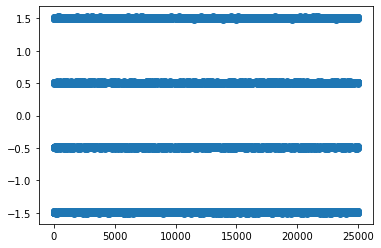

In [46]:
x_range = range(len(df_birch))
x = np.array(list(zip(x_range, df_birch))).reshape(len(x_range), 2)

plt.scatter(x[:,0], x[:,1])
plt.show()

Birch(branching_factor=100, n_clusters=4)


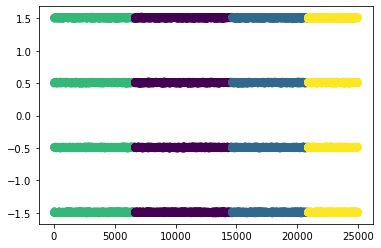

In [47]:
bclust=Birch(branching_factor=100,n_clusters = 4,threshold=.5).fit(x)
print(bclust)

labels = bclust.predict(x)

plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()

<AxesSubplot:>

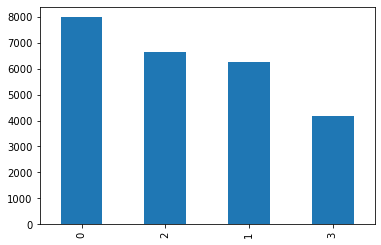

In [48]:
resultDfb = pd.DataFrame(labels)
resultDfb.iloc[:,0].value_counts().plot.bar()

#### The End.